In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from torch.utils.data import random_split, DataLoader
import time
from tqdm import tqdm
import seaborn as sns
from initializations import initialize_model

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [14]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

In [4]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [5]:
# Define a CNN model with configurable activation functions for each layer
class CNNModel(nn.Module):
    def __init__(self, activations=None):
        super(CNNModel, self).__init__()

        if activations is None:
            activations = nn.ReLU()

        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1, stride=1),
            activations,
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=1),
            activations,
            nn.MaxPool2d(2)
        )

        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=1, padding=1),
            activations,
            nn.MaxPool2d(2)
        )

        self.dense1 = nn.Sequential(
            nn.Linear(3200, 128),
            activations
        )
        self.dense2 = nn.Sequential(
            nn.Linear(128, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)
        out = self.dense1(out)
        out = self.dense2(out)
        return out

In [6]:
def train_val_model(model, num_epochs=20):
    train={
        'loss': [],
        'time': []
    }
    validation={
        'accuracy': []
    }
    for epoch in range(num_epochs):
        model.train()
        start_time = time.time()
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}", leave=False)
        epoch_loss = 0
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            progress_bar.set_postfix({'Loss': loss.item()})

            _, predicted = torch.max(outputs.data, 1)

        avg_loss = epoch_loss / len(train_loader)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Avg Loss: {avg_loss:.4f}, Time: {time.time() - start_time:.2f}s')
        
        train['loss'].append(avg_loss)
        train['time'].append(time.time() - start_time)
        model.eval()
        predictions_val = []
        labels_val = []
        with torch.no_grad():
            for images, labels in validation_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                _, predicted = torch.max(outputs.data, 1)
                predictions_val.extend(predicted.cpu().numpy())
                labels_val.extend(labels.cpu().numpy())

        validation['accuracy'].append(accuracy_score(labels_val, predictions_val))

    return train, validation

In [7]:
activations = [nn.ReLU(), nn.LeakyReLU(), nn.Sigmoid(), nn.Tanh(), nn.SELU()]
initialisations = ['normal', 'xavier_normal', 'he_normal', 'lecun_normal', 'zeros']

In [ ]:
results = {}
for i in range(5):
    model = CNNModel(activations[i]).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    for j in range(5):
        initialize_model(model, initialisations[j])
        train, validation = train_val_model(model, num_epochs=10)
        results[initialisations[j] + '_' + activations[i].__class__.__name__] = {
            'train': train,
            'validation': validation
        }

Epoch [1/10], Avg Loss: 2.0310, Time: 17.22s


Epoch [2/10], Avg Loss: 1.8972, Time: 15.82s


Epoch [3/10], Avg Loss: 1.8440, Time: 15.87s


Epoch [4/10], Avg Loss: 1.8096, Time: 15.93s


Epoch [5/10], Avg Loss: 1.7846, Time: 15.82s


Epoch [6/10], Avg Loss: 1.7626, Time: 15.83s


Epoch [7/10], Avg Loss: 1.7456, Time: 15.91s


Epoch [8/10], Avg Loss: 1.7264, Time: 15.94s


Epoch [9/10], Avg Loss: 1.7137, Time: 15.80s


Epoch [10/10], Avg Loss: 1.7007, Time: 15.81s


Epoch [1/10], Avg Loss: 2.0846, Time: 15.87s


Epoch [2/10], Avg Loss: 1.9996, Time: 15.89s


Epoch [3/10], Avg Loss: 1.9648, Time: 15.81s


Epoch [4/10], Avg Loss: 1.9425, Time: 15.94s


Epoch [5/10], Avg Loss: 1.9233, Time: 15.90s


Epoch [6/10], Avg Loss: 1.9041, Time: 15.91s


Epoch [7/10], Avg Loss: 1.8900, Time: 15.92s


Epoch [8/10], Avg Loss: 1.8786, Time: 15.82s


Epoch [9/10], Avg Loss: 1.8652, Time: 15.85s


Epoch [10/10], Avg Loss: 1.8569, Time: 15.88s


Epoch [1/10], Avg Loss: 2.3612, Time: 15.82s


Epoch [2/10], Avg Loss: 2.3611, Time: 15.91s


Epoch [3/10], Avg Loss: 2.3612, Time: 15.91s


Epoch [4/10], Avg Loss: 2.3612, Time: 15.97s


Epoch [5/10], Avg Loss: 2.3612, Time: 15.88s


Epoch [6/10], Avg Loss: 2.3612, Time: 15.92s


Epoch [7/10], Avg Loss: 2.3610, Time: 16.03s


Epoch [8/10], Avg Loss: 2.3612, Time: 15.93s


Epoch [9/10], Avg Loss: 2.3611, Time: 15.86s


Epoch [10/10], Avg Loss: 2.3611, Time: 15.92s


Epoch [1/10], Avg Loss: 2.0758, Time: 15.85s


Epoch [2/10], Avg Loss: 1.9606, Time: 15.88s


Epoch [3/10], Avg Loss: 1.8691, Time: 15.94s


Epoch [4/10], Avg Loss: 1.8186, Time: 15.97s


Epoch [5/10], Avg Loss: 1.7893, Time: 15.93s


Epoch [6/10], Avg Loss: 1.7705, Time: 15.92s


Epoch [7/10], Avg Loss: 1.7507, Time: 15.94s


Epoch [8/10], Avg Loss: 1.7371, Time: 15.85s


Epoch [9/10], Avg Loss: 1.7247, Time: 15.84s


Epoch [10/10], Avg Loss: 1.7150, Time: 15.93s


Epoch [1/10], Avg Loss: 2.3026, Time: 15.89s


Epoch [2/10], Avg Loss: 2.3026, Time: 15.85s


Epoch [3/10], Avg Loss: 2.3026, Time: 15.93s


Epoch [4/10], Avg Loss: 2.3026, Time: 15.87s


Epoch [5/10], Avg Loss: 2.3026, Time: 15.91s


Epoch [6/10], Avg Loss: 2.2954, Time: 15.95s


Epoch [7/10], Avg Loss: 2.1749, Time: 15.99s


Epoch [8/10], Avg Loss: 2.1235, Time: 15.87s


Epoch [9/10], Avg Loss: 2.0934, Time: 15.91s


Epoch [10/10], Avg Loss: 2.0271, Time: 16.05s


Epoch [1/10], Avg Loss: 2.0657, Time: 15.89s


Epoch [2/10], Avg Loss: 1.9515, Time: 15.87s


Epoch [3/10], Avg Loss: 1.8964, Time: 15.82s


Epoch [4/10], Avg Loss: 1.8659, Time: 15.83s


Epoch [5/10], Avg Loss: 1.8429, Time: 15.76s


Epoch [6/10], Avg Loss: 1.8238, Time: 15.80s


Epoch [7/10], Avg Loss: 1.8087, Time: 15.81s


Epoch [8/10], Avg Loss: 1.7943, Time: 15.82s


Epoch [9/10], Avg Loss: 1.7816, Time: 15.87s


Epoch [10/10], Avg Loss: 1.7678, Time: 15.86s


Epoch [1/10], Avg Loss: 2.0749, Time: 15.82s


Epoch [2/10], Avg Loss: 1.9500, Time: 15.83s


Epoch [3/10], Avg Loss: 1.8810, Time: 15.89s


Epoch [4/10], Avg Loss: 1.8397, Time: 15.78s


Epoch [5/10], Avg Loss: 1.8089, Time: 15.83s


Epoch [6/10], Avg Loss: 1.7796, Time: 15.99s


Epoch [7/10], Avg Loss: 1.7614, Time: 15.79s


Epoch [8/10], Avg Loss: 1.7413, Time: 15.85s


Epoch [9/10], Avg Loss: 1.7278, Time: 15.84s


Epoch [10/10], Avg Loss: 1.7128, Time: 15.89s


Epoch [1/10], Avg Loss: 2.3603, Time: 15.88s


Epoch [2/10], Avg Loss: 2.3611, Time: 15.90s


Epoch [3/10], Avg Loss: 2.3612, Time: 15.86s


Epoch [4/10], Avg Loss: 2.3611, Time: 15.79s


Epoch [5/10], Avg Loss: 2.3611, Time: 15.84s


Epoch [6/10], Avg Loss: 2.3612, Time: 15.83s


Epoch [7/10], Avg Loss: 2.3611, Time: 15.82s


Epoch [8/10], Avg Loss: 2.3612, Time: 15.81s


Epoch [9/10], Avg Loss: 2.3612, Time: 15.85s


Epoch [10/10], Avg Loss: 2.3609, Time: 15.91s


Epoch 1/10:  61%|██████▏   | 479/782 [00:09<00:06, 48.67it/s, Loss=2.34]

In [15]:
# no stability check here - will just look at the visualizations

convergence_speed = {}
finall_accuracy = {}

for key, value in results.items():
    max_accuracy = max(value['validation']['accuracy'])
    # iteration to surpass 90% of the highest accuracy
    index = next(i for i, v in enumerate(value['validation']['accuracy']) if v > 0.9 * max_accuracy)
    convergence_speed[key] = sum(value['train']['time'][:index])

    finall_accuracy[key] = max_accuracy

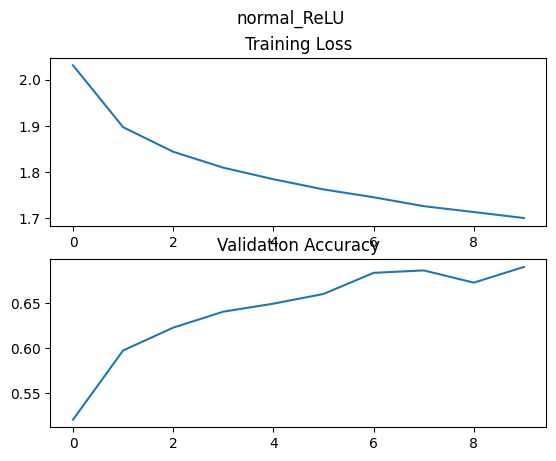

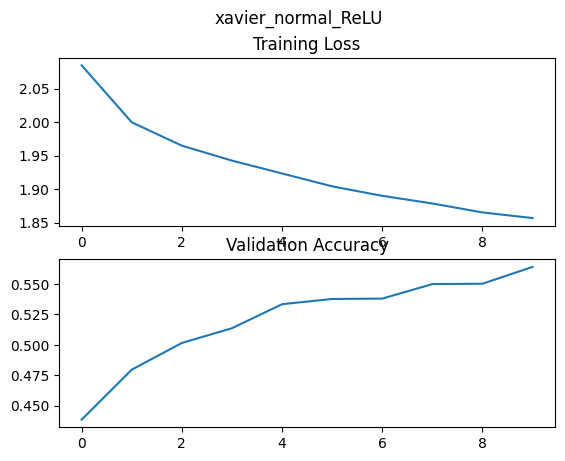

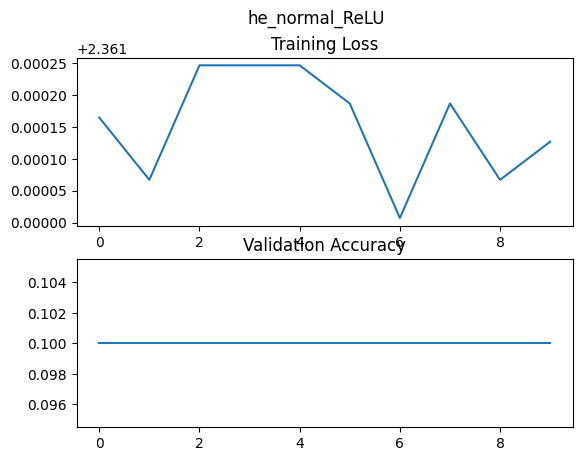

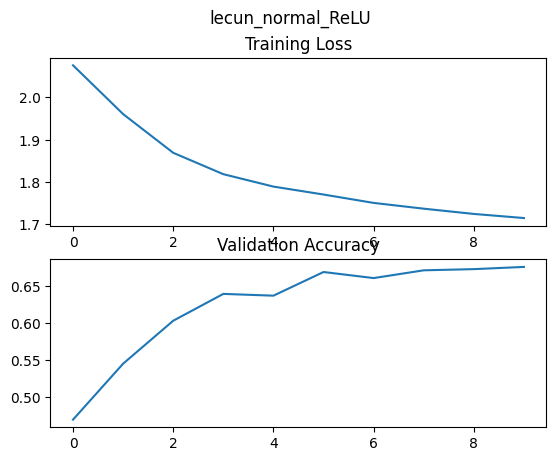

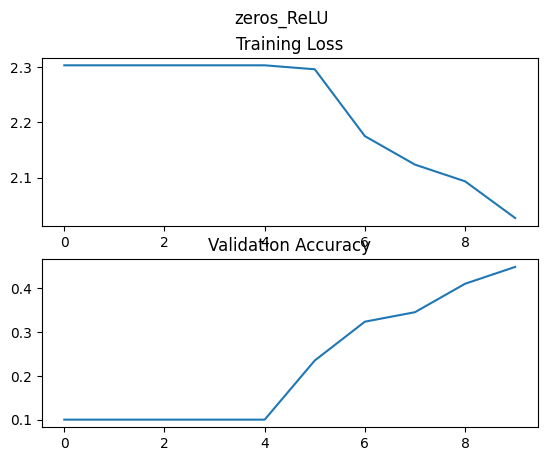

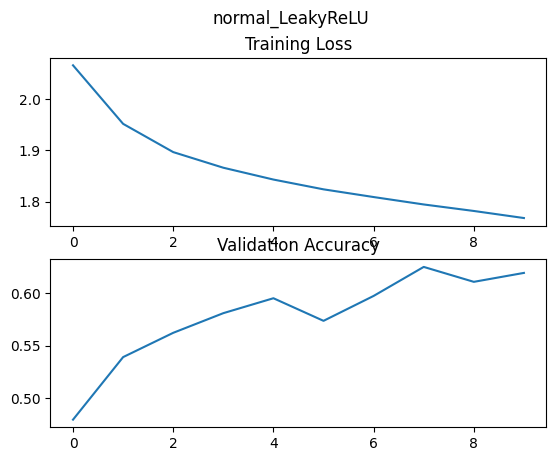

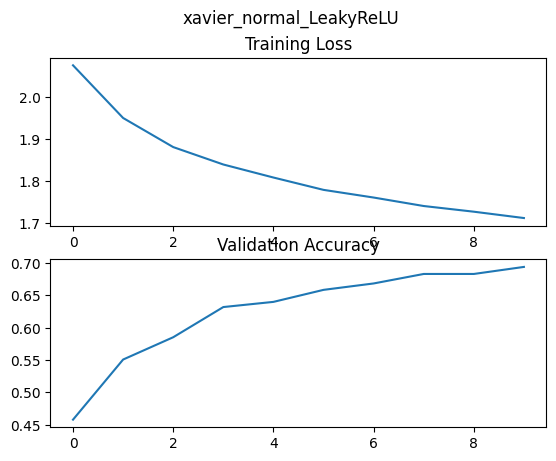

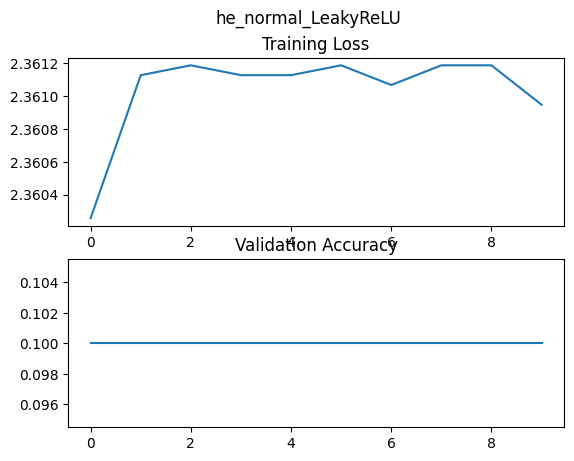

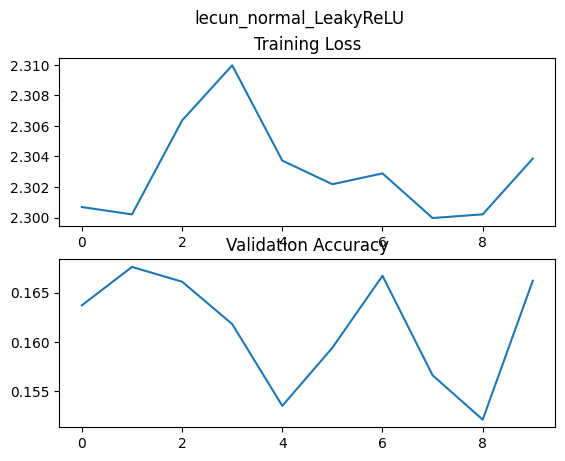

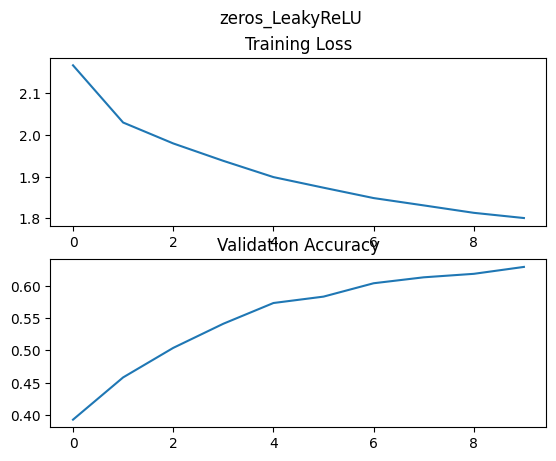

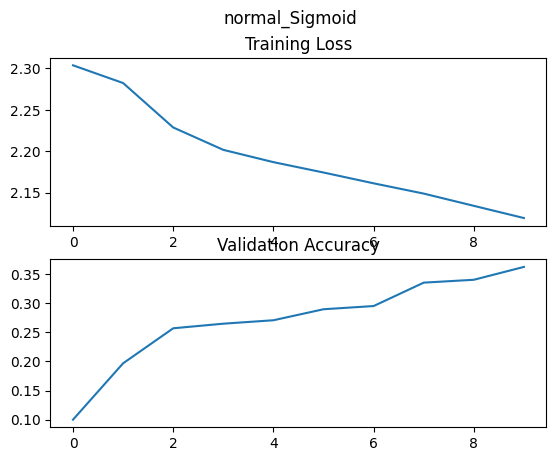

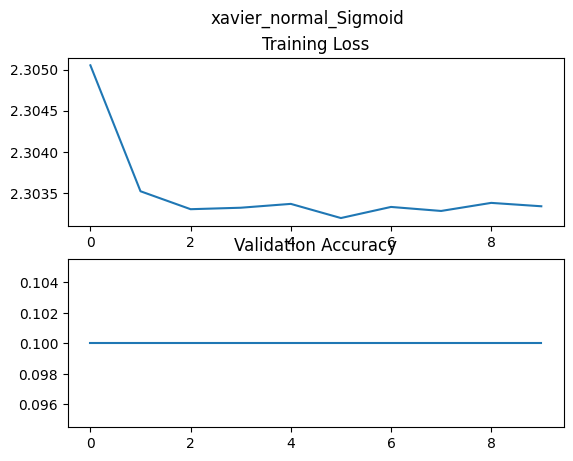

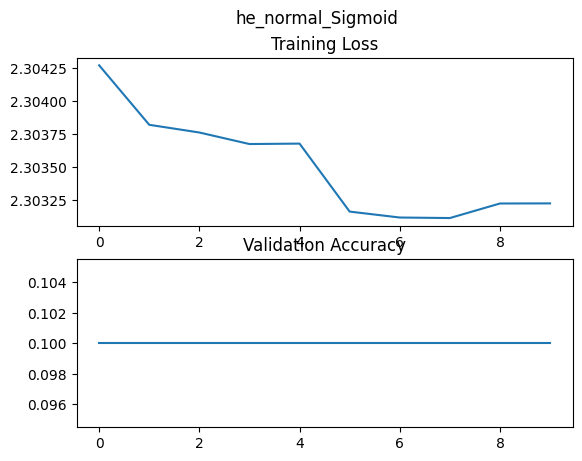

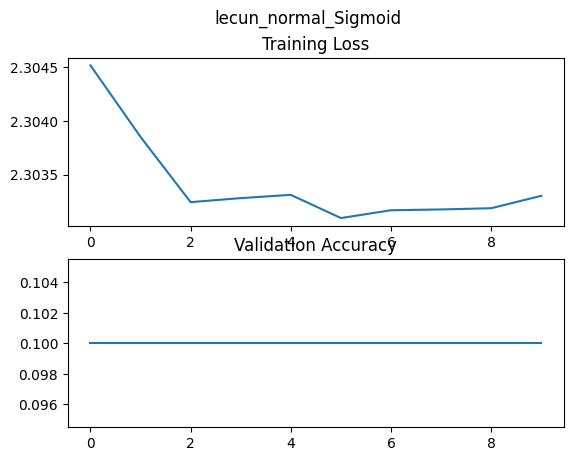

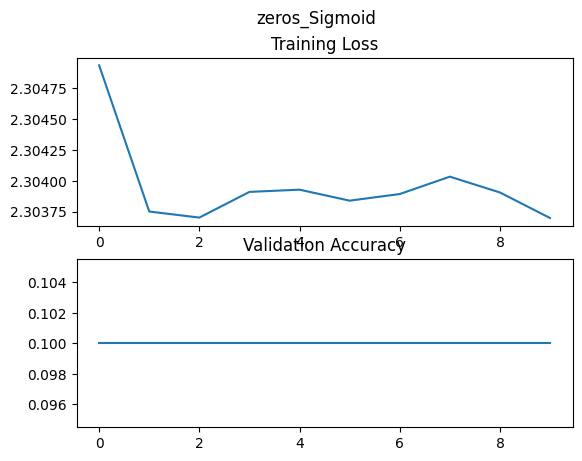

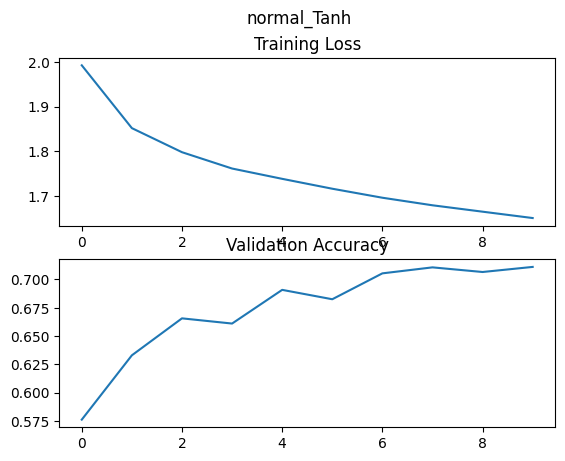

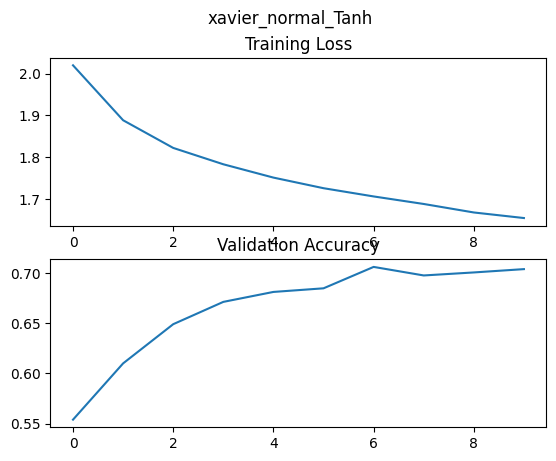

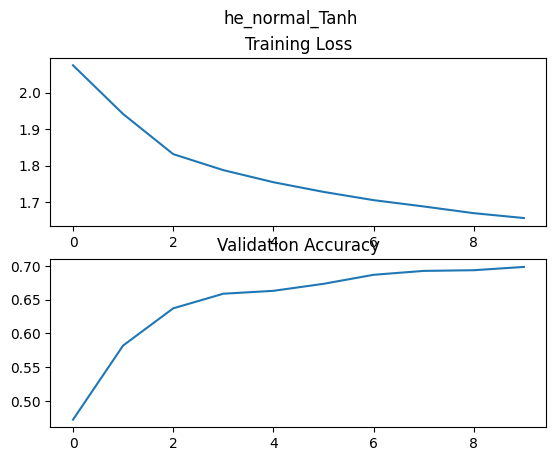

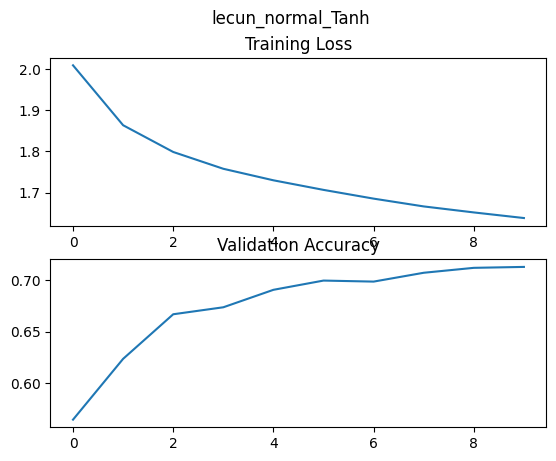

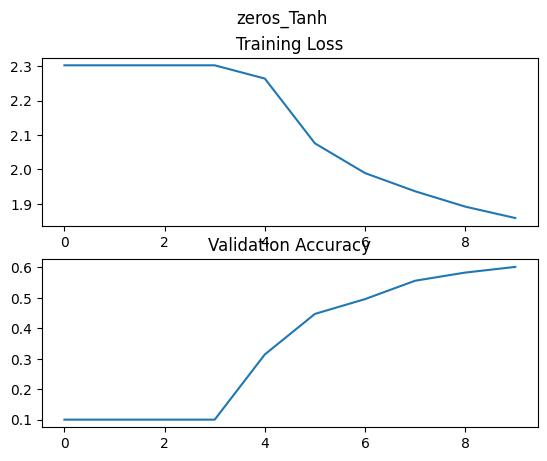

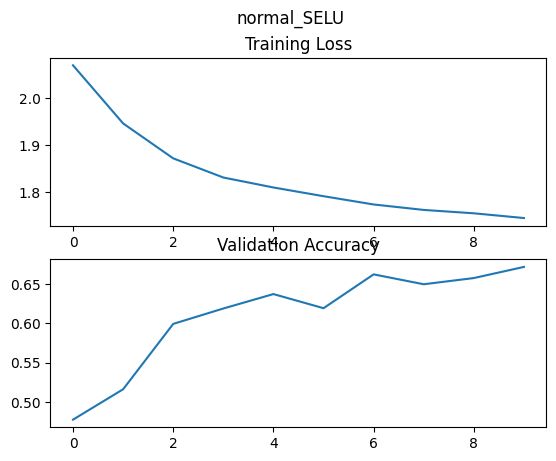

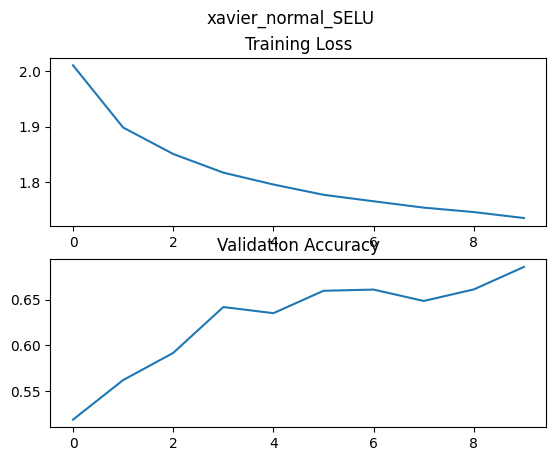

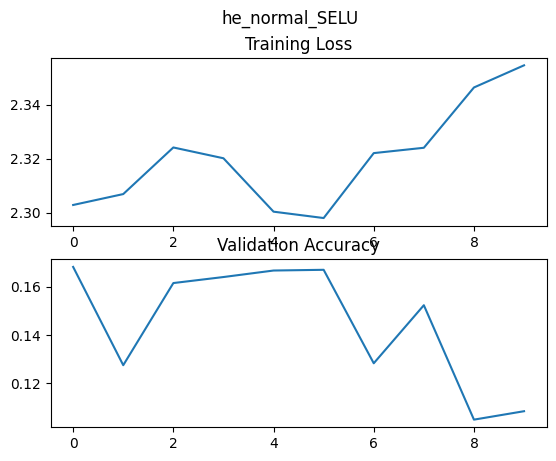

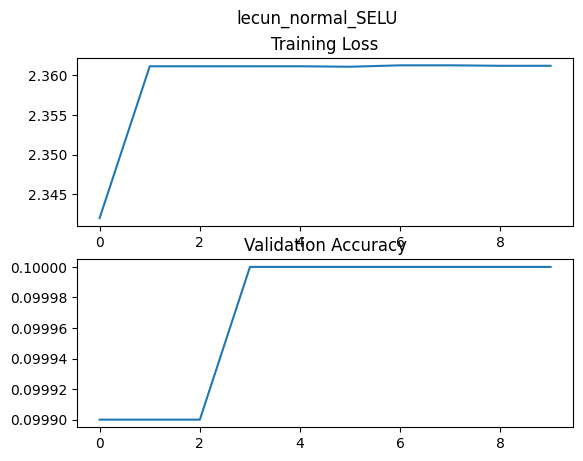

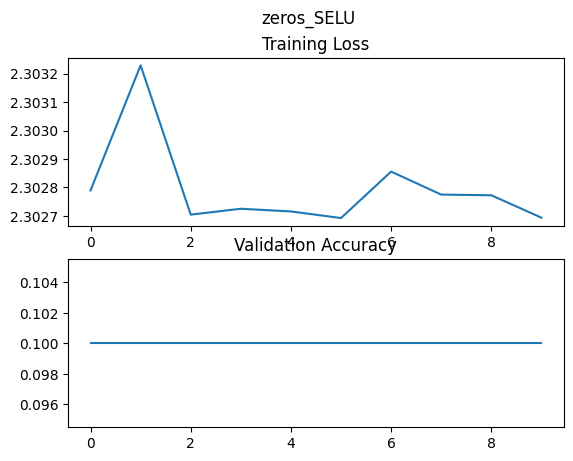

In [16]:
"""Plots for Each Combination:
Training Loss vs. Epochs.
Validation Accuracy vs. Epochs.
"""

for key, value in results.items():
    fig, axs = plt.subplots(2)
    fig.suptitle(key)
    axs[0].plot(value['train']['loss'])
    axs[0].set_title('Training Loss')
    axs[1].plot(value['validation']['accuracy'])
    axs[1].set_title('Validation Accuracy')
    plt.savefig(f'plots/{key}.png')
    plt.show()

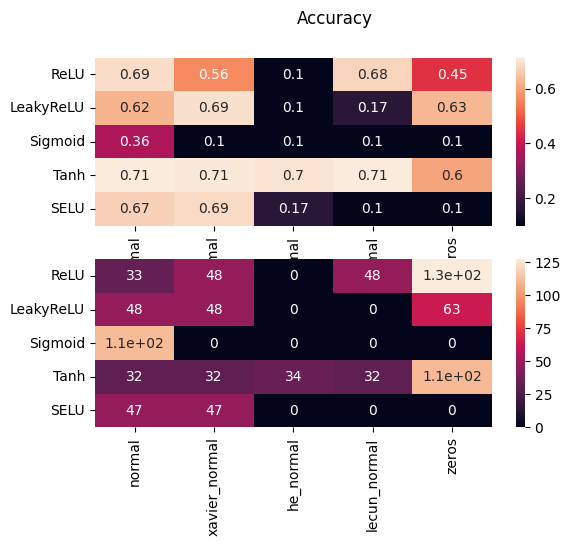

In [17]:
"""Heatmaps:
Accuracy for each combination of initialization and activation function.
Training time for each combination.
"""

accuracy = []
time = []
for i in range(5):
    accuracy.append([finall_accuracy[initialisations[j] + '_' + activations[i].__class__.__name__] for j in range(5)])
    time.append([convergence_speed[initialisations[j] + '_' + activations[i].__class__.__name__] for j in range(5)])

fig, axs = plt.subplots(2)
fig.suptitle('Accuracy')

sns.heatmap(accuracy, annot=True, xticklabels=initialisations, yticklabels=[activation.__class__.__name__ for activation in activations], ax=axs[0])
sns.heatmap(time, annot=True, xticklabels=initialisations, yticklabels=[activation.__class__.__name__ for activation in activations], ax=axs[1])

plt.savefig('plots/heatmap.png')
plt.show()